In [ ]:
#Install required Libraries
!pip install pandas numpy scikit-learn



In [19]:
#upload dataset
from google.colab import files
files.upload()


Saving loan_approval_dataset.csv to loan_approval_dataset (1).csv


{'loan_approval_dataset (1).csv': b'loan_id, no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score, residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value, loan_status\r\n1,2, Graduate, No,9600000,29900000,12,778,2400000,17600000,22700000,8000000, Approved\r\n2,0, Not Graduate, Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000, Rejected\r\n3,3, Graduate, No,9100000,29700000,20,506,7100000,4500000,33300000,12800000, Rejected\r\n4,3, Graduate, No,8200000,30700000,8,467,18200000,3300000,23300000,7900000, Rejected\r\n5,5, Not Graduate, Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000, Rejected\r\n6,0, Graduate, Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000, Rejected\r\n7,5, Graduate, No,8700000,33000000,4,678,22500000,14800000,29200000,4300000, Approved\r\n8,2, Graduate, Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000, Rejected\r\n9,0, Graduate, Yes,800000,2200000,20

# New Section

In [20]:
#Load & Preprocess Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("loan_approval_dataset.csv")

# Remove extra spaces in column names
df.columns = df.columns.str.strip()

# Drop loan_id (not useful)
df.drop("loan_id", axis=1, inplace=True)

df.head()



,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [21]:
#Encode Categorical Data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['education'] = le.fit_transform(df['education'])        # Graduate=1, Not=0
df['self_employed'] = le.fit_transform(df['self_employed'])# Yes=1, No=0
df['loan_status'] = le.fit_transform(df['loan_status'])    # Approved=1


In [22]:
#Split Features & Target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

print("Input shape:", X.shape)
print("Target shape:", y.shape)


Input shape: (4269, 11)
Target shape: (4269,)


In [23]:
#Train Machine Learning Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)

print("✅ Model trained successfully")
y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)


✅ Model trained successfully
Accuracy: 0.977751756440281


In [24]:
df.describe()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000
mean,2.498712,0.497775,0.503631,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,0.377840
std,1.695910,0.500054,0.500045,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,0.484904
min,0.000000,0.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000
25%,1.000000,0.000000,0.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000
50%,3.000000,0.000000,1.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,0.000000
75%,4.000000,1.000000,1.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000
max,5.000000,1.000000,1.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,1.000000


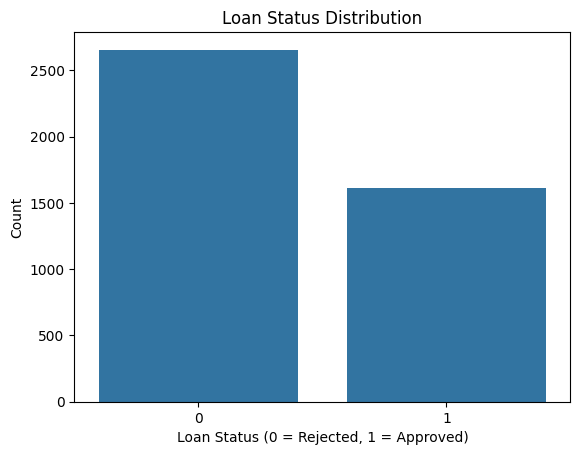

In [25]:
#Loan Status Distribution (Approved vs Rejected)
plt.figure()
sns.countplot(x='loan_status', data=df)
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
plt.ylabel("Count")
plt.show()


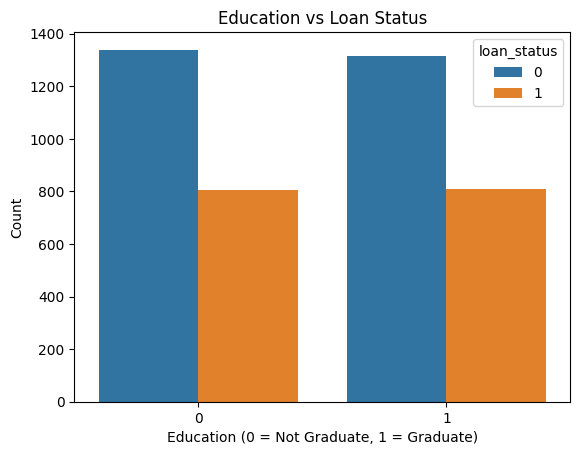

In [26]:
#Education vs Loan Status
plt.figure()
sns.countplot(x='education', hue='loan_status', data=df)
plt.title("Education vs Loan Status")
plt.xlabel("Education (0 = Not Graduate, 1 = Graduate)")
plt.ylabel("Count")
plt.show()


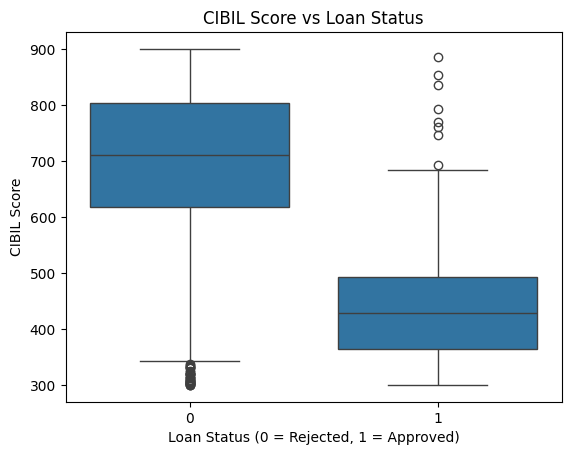

In [27]:
#Cibil Score vs Loan Status
plt.figure()
sns.boxplot(x='loan_status', y='cibil_score', data=df)
plt.title("CIBIL Score vs Loan Status")
plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
plt.ylabel("CIBIL Score")
plt.show()


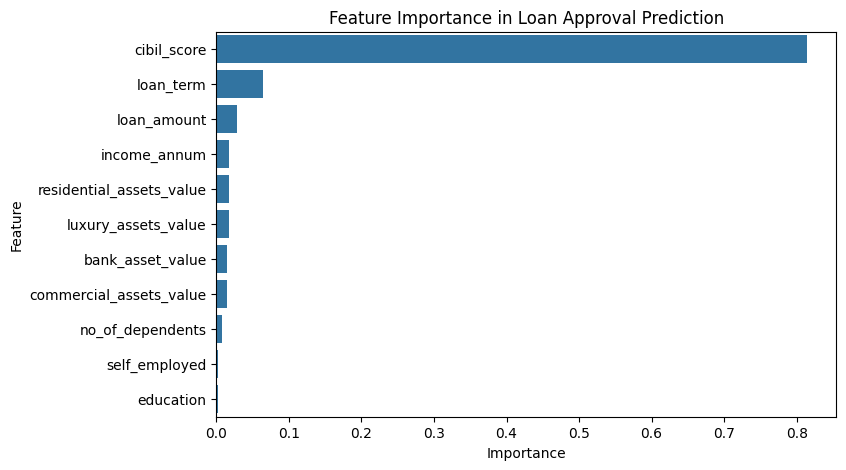

In [28]:
#Feature Importance Graph
import pandas as pd

importance = model.feature_importances_
features = X.columns

feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importance in Loan Approval Prediction")
plt.show()


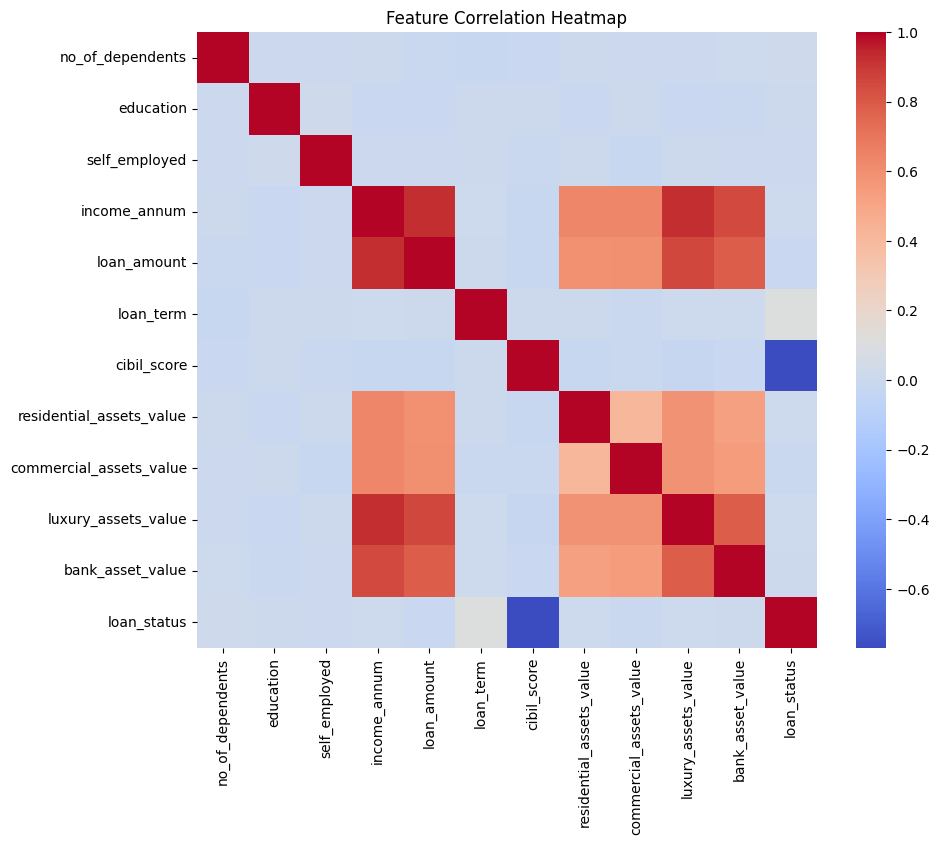

In [29]:
#Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [30]:
#Prediction Function
def loan_prediction(
    dependents,
    education,
    self_employed,
    income,
    loan_amount,
    loan_term,
    cibil,
    residential,
    commercial,
    luxury,
    bank
):
    data = [[
        dependents,
        education,
        self_employed,
        income,
        loan_amount,
        loan_term,
        cibil,
        residential,
        commercial,
        luxury,
        bank
    ]]

    result = model.predict(data)
    return "Loan Approved ✅" if result[0] == 1 else "Loan Rejected ❌"


In [31]:
#Test with sample input
loan_prediction(
    dependents=2,
    education=1,        # Graduate
    self_employed=0,    # No
    income=9600000,
    loan_amount=29900000,
    loan_term=12,
    cibil=778,
    residential=2400000,
    commercial=17600000,
    luxury=22700000,
    bank=8000000
)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'Loan Rejected ❌'

In [32]:
#Take User input Manually
d = int(input("Dependents: "))
e = int(input("Education (Graduate=1, Not=0): "))
s = int(input("Self Employed (Yes=1, No=0): "))
i = int(input("Annual Income: "))
l = int(input("Loan Amount: "))
t = int(input("Loan Term: "))
c = int(input("CIBIL Score: "))
r = int(input("Residential Assets: "))
co = int(input("Commercial Assets: "))
lu = int(input("Luxury Assets: "))
b = int(input("Bank Assets: "))

print(loan_prediction(d,e,s,i,l,t,c,r,co,lu,b))


Dependents: 2
Education (Graduate=1, Not=0): 0
Self Employed (Yes=1, No=0): 0
Annual Income: 100000
Loan Amount: 20000
Loan Term: 100
CIBIL Score: 690
Residential Assets: 30000
Commercial Assets: 40000
Luxury Assets: 50000
Bank Assets: 60000
Loan Rejected ❌


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
